In [2]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('suv_data.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.ndim

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


Here we can observe that:
- Data has 5 columns and 400 rows with no null value present in any record.
- Except gender column all other are numerical values.

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


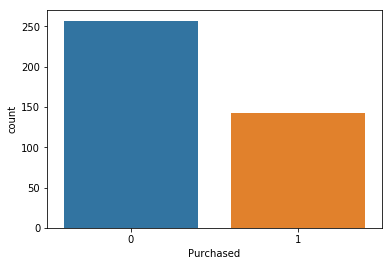

In [9]:
sns.countplot(x='Purchased',data=df)

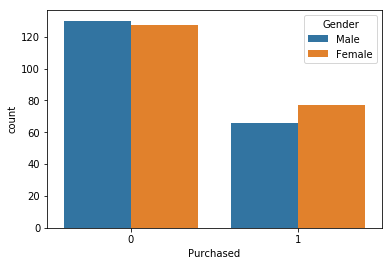

In [10]:
sns.countplot(x='Purchased',hue='Gender',data=df)

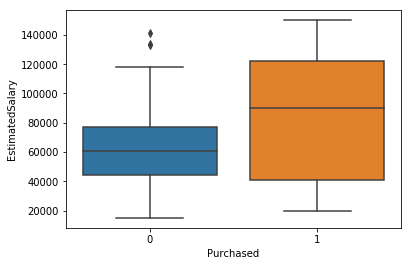

In [11]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=df)

In [20]:
#converting gender to numerical value
sex=pd.get_dummies(df['Gender'],drop_first=True)

In [23]:
df=pd.concat([df,sex],axis=1)

In [24]:
df.drop('Gender',axis=1,inplace=True)

In [25]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [26]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [27]:
from sklearn.cross_validation import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmod=LogisticRegression()

In [31]:
logmod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predict=logmod.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
classification_report(y_test,predict)

'             precision    recall  f1-score   support\n\n          0       0.80      0.97      0.87        68\n          1       0.88      0.47      0.61        32\n\navg / total       0.82      0.81      0.79       100\n'

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,predict)

array([[66,  2],
       [17, 15]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,predict)

0.81